# Tapasin Dependency of HLA molecules

Here we predict HLA tapasin dependency. The data is from Bashirova et. al. and Ilca et. al. but we only consider Bashirova because they provide MFI ratio with and without tapasin (essentially, MHC surface level expression with and without tapasin molecule) 

In [54]:
# load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import *

In [49]:
# Load Tapasin dependency data
TD_df = pd.read_csv('./Data/raw_data/TD_MFI_ratio.csv',index_col=0)
TD_df = TD_df[TD_df['Source']=='Bashirova'].reset_index(drop=True)

TD_df

,HLA_full,HLA,MFI_ratio,SD,Source
0,HLA-A*01:01,A*01:01,32.11,13.77,Bashirova
1,HLA-A*01:02,A*01:02,109.86,35.04,Bashirova
2,HLA-A*02:01,A*02:01,2.02,0.22,Bashirova
3,HLA-A*02:02,A*02:02,1.45,0.16,Bashirova
4,HLA-A*02:05,A*02:05,1.49,0.12,Bashirova
...,...,...,...,...,...
92,HLA-C*16:01,C*16:01,5.98,1.33,Bashirova
93,HLA-C*17:01,C*17:01,2.92,0.98,Bashirova
94,HLA-C*17:03,C*17:03,3.63,1.29,Bashirova
95,HLA-C*18:01,C*18:01,2.76,0.80,Bashirova


In [50]:
# Load HLA sequences
fasta_file = './Data/raw_data/allele_seq_IPD_IMGT.fasta'
HLA_seq_df = fasta_to_dataframe(fasta_file)
HLA_seq_df['HLA_2fields'] = [i[0:7] for i in HLA_seq_df['HLA']]
HLA_seq_df['remaining_fields'] = [i[8:] for i in HLA_seq_df['HLA']]

# select HLA basic version
HLA_seq_df = HLA_seq_df[HLA_seq_df['HLA_2fields'].isin(TD_df['HLA'])]
HLA_seq_df

,ID,Sequence,HLA,length,HLA_2fields,remaining_fields
0,HLA:HLA00001,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*01:01:01:01,365,A*01:01,01:01
1,HLA:HLA02169,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*01:01:01:02N,200,A*01:01,01:02N
2,HLA:HLA14798,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*01:01:01:03,365,A*01:01,01:03
3,HLA:HLA15760,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*01:01:01:04,365,A*01:01,01:04
4,HLA:HLA16415,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*01:01:01:05,365,A*01:01,01:05
...,...,...,...,...,...,...
25811,HLA:HLA33078,MRVMAPRALLLLLSGGLALTETWACSHSMRYFDTAVSRPGRGEPRF...,C*18:02:01:04,366,C*18:02,01:04
25812,HLA:HLA19570,MRVMAPRALLLLLSGGLALTETWACSHSMRYFDTAVSRPGRGEPRF...,C*18:02:02,366,C*18:02,02
25813,HLA:HLA21492,MRVMAPRALLLLLSGGLALTETWACSHSMRYFDTAVSRPGRGEPRF...,C*18:02:03,366,C*18:02,03
25814,HLA:HLA23300,MRVMAPRALLLLLSGGLALTETWACSHSMRYFDTAVSRPGRGEPRF...,C*18:02:04,366,C*18:02,04


In [51]:
# Select 01 or 01:01
Bashirova_hla_seq_df_part1 = HLA_seq_df[HLA_seq_df['remaining_fields'].isin(['01:01','01'])]

# HLA which do not have 01 or 01:01, checked manually
Missing_bashirova_hla_ls = [i for i in HLA_seq_df['HLA_2fields'].unique() 
 if i not in HLA_seq_df[HLA_seq_df['remaining_fields'].isin(['01:01','01'])]['HLA_2fields'].unique()]

print("Missing bashirova hla: ",Missing_bashirova_hla_ls)
Missing_bashirova_hla_mapping_ls = ['C*17:01:01:02','A*31:01:02:01','B*27:05:02:01','B*78:01:01:02']

Bashirova_hla_seq_df_part2 = HLA_seq_df[HLA_seq_df['HLA'].isin(Missing_bashirova_hla_mapping_ls)]

# combine part1 and part2
Bashirova_hla_seq_df = pd.concat([Bashirova_hla_seq_df_part1,Bashirova_hla_seq_df_part2]).drop('remaining_fields',axis=1)
Bashirova_hla_seq_df = Bashirova_hla_seq_df.reset_index(drop=True)
Bashirova_hla_seq_df

Missing bashirova hla:  ['A*31:01', 'B*27:05', 'B*78:01', 'C*17:01']


,ID,Sequence,HLA,length,HLA_2fields
0,HLA:HLA00001,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*01:01:01:01,365,A*01:01
1,HLA:HLA00002,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFSTSVSRPGSGEPRF...,A*01:02:01:01,365,A*01:02
2,HLA:HLA00005,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:01:01:01,365,A*02:01
3,HLA:HLA00007,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,A*02:02:01:01,365,A*02:02
4,HLA:HLA00010,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,A*02:05:01:01,365,A*02:05
...,...,...,...,...,...
92,HLA:HLA00484,MRVMAPRALLLLLSGGLALTETWACSHSMRYFDTAVSRPGRGEPRF...,C*18:02:01:01,366,C*18:02
93,HLA:HLA00097,MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFTTSVSRPGRGEPRF...,A*31:01:02:01,365,A*31:01
94,HLA:HLA00225,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFHTSVSRPGRGEPRF...,B*27:05:02:01,362,B*27:05
95,HLA:HLA16309,MRVTAPRTVLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...,B*78:01:01:02,362,B*78:01


In [52]:
# Create final processed data
TD_full_df = pd.merge(TD_df, Bashirova_hla_seq_df, left_on='HLA',right_on='HLA_2fields',how='left').drop(['HLA_y','HLA_2fields'],axis=1)
TD_full_df = TD_full_df.rename(columns={'HLA_x':'HLA'})

# Save processed df
TD_full_df.to_csv('./Data/processed_data/TD_full.csv')

,HLA_full,HLA,MFI_ratio,SD,Source,ID,Sequence,length
0,HLA-A*01:01,A*01:01,32.11,13.77,Bashirova,HLA:HLA00001,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,365
1,HLA-A*01:02,A*01:02,109.86,35.04,Bashirova,HLA:HLA00002,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFSTSVSRPGSGEPRF...,365
2,HLA-A*02:01,A*02:01,2.02,0.22,Bashirova,HLA:HLA00005,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,365
3,HLA-A*02:02,A*02:02,1.45,0.16,Bashirova,HLA:HLA00007,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,365
4,HLA-A*02:05,A*02:05,1.49,0.12,Bashirova,HLA:HLA00010,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,365
...,...,...,...,...,...,...,...,...
92,HLA-C*16:01,C*16:01,5.98,1.33,Bashirova,HLA:HLA00475,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,366
93,HLA-C*17:01,C*17:01,2.92,0.98,Bashirova,HLA:HLA04311,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,372
94,HLA-C*17:03,C*17:03,3.63,1.29,Bashirova,HLA:HLA00993,MRVMAPQALLLLLSGALALIETWTGSHSMRYFYTAVSRPGRGEPRF...,372
95,HLA-C*18:01,C*18:01,2.76,0.80,Bashirova,HLA:HLA00483,MRVMAPRALLLLLSGGLALTETWACSHSMRYFDTAVSRPGRGEPRF...,366


# EDA - plots

In [107]:
fontsize = 14
dpi = 600
ncols = 1
nrows = 1
figsize = (6,6)

TD_full_df = pd.read_csv('./Data/processed_data/TD_full.csv',index_col=0)

/tmp/ipykernel_69763/1357308460.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize)


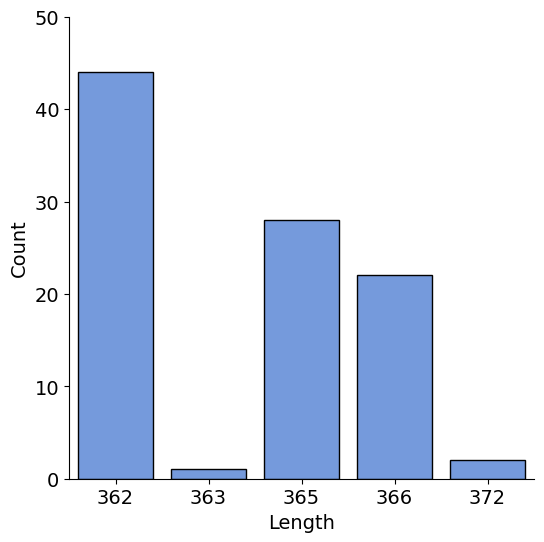

In [106]:
# Length distribution
fig,axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

b = sns.countplot(data=TD_full_df, x='length',
                 ax=axs, color='cornflowerblue',
                 linewidth=1, edgecolor='black')

b.set_xlabel('Length', fontsize=fontsize)
b.set_ylabel('Count', fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize)
b.set(ylim=(0,50))

sns.despine(top=True, right=True)
plt.savefig('./Data/figures/HLA_length_distribution.png',dpi=dpi, transparent=True)

/tmp/ipykernel_69763/2267161635.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize)
/tmp/ipykernel_69763/2267161635.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize)


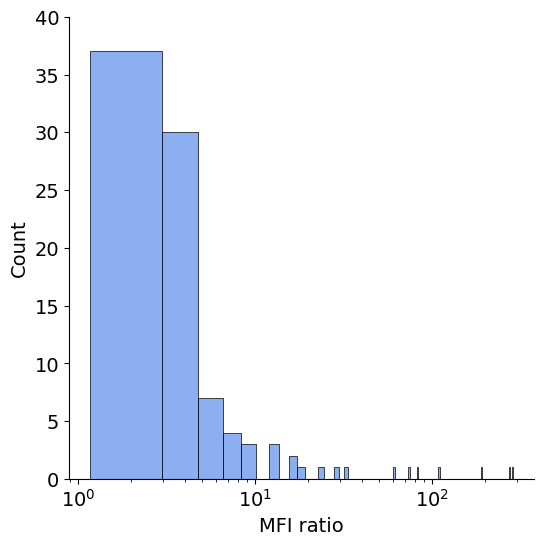

In [113]:
# MFI distribution log scale
fig,axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

b = sns.histplot(data=TD_full_df, x='MFI_ratio',
                 ax=axs, color='cornflowerblue',
                 linewidth=0.5, edgecolor='black')

b.set_xlabel('MFI ratio', fontsize=fontsize)
b.set_ylabel('Count', fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize)

# Set x-axis to logarithmic scale
b.set_xscale('log')

b.set(ylim=(0,40))

sns.despine(top=True, right=True)
plt.savefig('./Data/figures/MFI_ratio_distribution_log.png',dpi=dpi, transparent=True)

/tmp/ipykernel_69763/3772224484.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize)
/tmp/ipykernel_69763/3772224484.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize)


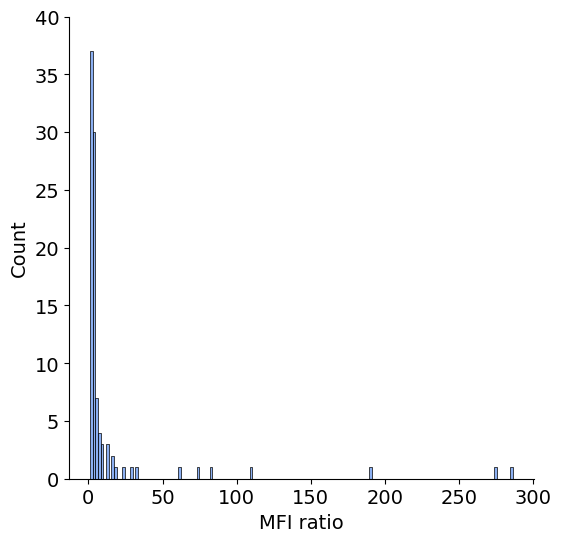

In [114]:
# MFI distribution
fig,axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

b = sns.histplot(data=TD_full_df, x='MFI_ratio',
                 ax=axs, color='cornflowerblue',
                 linewidth=0.5, edgecolor='black')

b.set_xlabel('MFI ratio', fontsize=fontsize)
b.set_ylabel('Count', fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize)

b.set(ylim=(0,40))

sns.despine(top=True, right=True)
plt.savefig('./Data/figures/MFI_ratio_distribution.png',dpi=dpi, transparent=True)